## The Basic classification - based on the tutorial from the TensorFlow [website](https://www.tensorflow.org/tutorials/keras/basic_classification).

### Importing libraries and printing their versions

In [17]:
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow version: " + str(tf.__version__))
print("Keras version: " + str(keras.__version__))

from keras.datasets import mnist

TensorFlow version: 1.13.1
Keras version: 2.2.4


### Loading '[MNIST database of handwritten digits](https://keras.io/datasets/)' dataset

In [113]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [116]:
class_names = {'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

### Example of figures stored in dataset

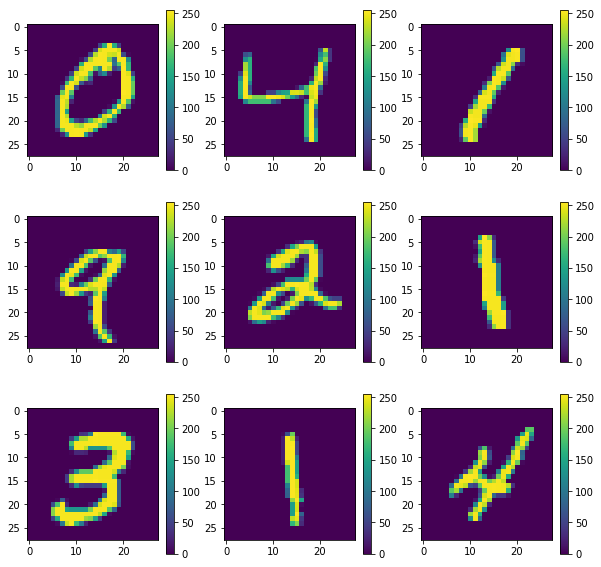

Images labels: 
0, 4, 1, 9, 2, 1, 3, 1, 4, 


In [73]:
fig=plt.figure(figsize=(10, 10))

columns = 3
rows = 3

labels = ''

for img_num in range(1, columns*rows + 1):
    img = x_train[img_num]
    fig.add_subplot(rows, columns, img_num)
    plt.imshow(img)
    plt.colorbar()
    labels = labels + str(y_train[img_num]) + ", "
    
plt.show()

print("Images labels: ")
print(labels)

### The images scaling

In [6]:
x_train_scal = x_train/255.0
x_test_scal = x_test/255.0

### The model creation

In [7]:
model = keras.Sequential([
                        keras.layers.Flatten(input_shape=(28, 28)),
                        keras.layers.Dense(128, activation=tf.nn.relu),
                        keras.layers.Dense(10, activation=tf.nn.softmax)
                        ])

Instructions for updating:
Colocations handled automatically by placer.


### The model compilation

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### The model fitting

In [9]:
model.fit(x_train_scal, y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 15s 252us/step - loss: 0.2572 - acc: 0.9269
Epoch 2/10
60000/60000 [==============================] - 15s 250us/step - loss: 0.1141 - acc: 0.9662
Epoch 3/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.0785 - acc: 0.9764
Epoch 4/10
60000/60000 [==============================] - 15s 253us/step - loss: 0.0572 - acc: 0.9825
Epoch 5/10
60000/60000 [==============================] - 16s 265us/step - loss: 0.0454 - acc: 0.9861
Epoch 6/10
60000/60000 [==============================] - 15s 246us/step - loss: 0.0365 - acc: 0.9886
Epoch 7/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0298 - acc: 0.9903
Epoch 8/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0228 - acc: 0.9928
Epoch 9/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.0199 - acc: 0.9938
Epoch 10/10
60000/60000 [=========

In [12]:
loss, acc = model.evaluate(x_test_scal, y_test)

10000/10000 [==============================] - 1s 95us/step


In [20]:
print("Loss function: " + str(np.round(loss, 3)) + ", Accuracy: " + str(np.round(acc, 3)))

Loss function: 0.086, Accuracy: 0.976


### Prediction of single number

In [264]:
img_predict = np.expand_dims(x_test_scal[0], 0)

prediction = model.predict(img_predict)

In [265]:
prediction[0]

array([2.34874364e-09, 3.26597117e-11, 7.91223371e-08, 3.06701731e-05,
       7.00043972e-13, 3.41881974e-11, 1.24536069e-14, 9.99969006e-01,
       1.18274144e-07, 7.15552844e-08], dtype=float32)

In [266]:
np.max(prediction[0])

0.999969

In [267]:
np.argmax(prediction[0])

7

Text(0, 0.5, 'Probability')

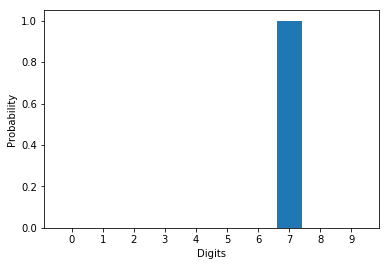

In [269]:
pl = plt.bar(np.arange(0, 10, 1), prediction[0], tick_label=np.arange(0,10,1))
plt.xlabel("Digits")
plt.ylabel("Probability")

## Test ended successfully - prepared model distinguished number correctly.

## Prediction of multiple digits

In [260]:
img_predicts = []
img_labels = []
max_img_number = 10

while True:
    rand_num = np.random.randint(0, 10000)
    img_predicts.append(np.expand_dims(x_test_scal[rand_num], 0))
    img_labels.append(rand_num)
    if len(img_predicts) == max_img_number:
        break

print("The image number to predict: " + str(len(img_predicts)))

The image number to predict: 10


In [261]:
predictions = []

for img in img_predicts:
    predictions.append(model.predict(img))

In [263]:
number = 0

for prediction in predictions:
    print("Number: " + str(y_test[img_labels[number]]))
    print("Predicted number: " + str(np.argmax(prediction)))
    print("Probability: " + str(np.max(prediction)))
    number += 1

Number: 1
Predicted number: 1
Probability: 0.9915726
Number: 7
Predicted number: 7
Probability: 0.9999962
Number: 6
Predicted number: 6
Probability: 1.0
Number: 4
Predicted number: 4
Probability: 0.99999964
Number: 0
Predicted number: 0
Probability: 0.9999367
Number: 9
Predicted number: 9
Probability: 0.9999639
Number: 6
Predicted number: 6
Probability: 1.0
Number: 7
Predicted number: 7
Probability: 0.999995
Number: 2
Predicted number: 2
Probability: 1.0
Number: 8
Predicted number: 8
Probability: 0.9999994


Text(1.5, -0.9, 'Predicted number: 8')

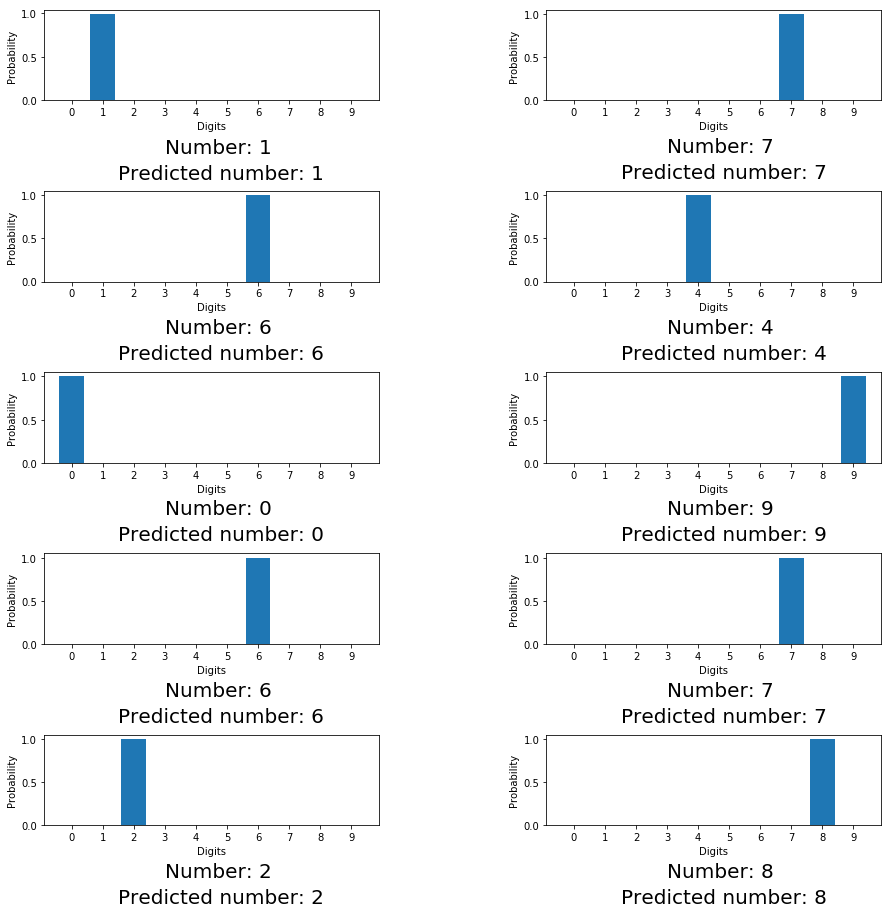

In [352]:
rows = 5
cols = 2

fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(wspace=0.5, hspace=1)
img_counter = 0

for num in range(1, rows*cols +1):
    plt.text(3, -0.6, 'Number: ' + str(y_test[img_labels[img_counter-1]]), fontsize=20)
    plt.text(1.5, -0.9, "Predicted number: " + str(np.argmax(predictions[img_counter-1])), fontsize=20)
    plt.subplot(rows, cols, num)
    #plt.bar(np.arange(0, 10, 1), predictions[0], tick_label=np.arange(0,10,1))
    ple = plt.bar(np.arange(0, 10, 1), predictions[img_counter][0], tick_label=np.arange(0,10,1))
    plt.xlabel("Digits")
    plt.ylabel("Probability")
    img_counter += 1
    
plt.text(3, -0.6, 'Number: ' + str(y_test[img_labels[-1]]), fontsize=20)
plt.text(1.5, -0.9, "Predicted number: " + str(np.argmax(predictions[-1])), fontsize=20)

## Test resulted in 100% of correct answers (for random digits from test dataset).

## Checking own dataset

### Loading test dataset